Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,StackingClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
%matplotlib inline 

Loading the dataset

In [2]:
df=pd.read_csv('zomato.csv')

Exploration and Feature Engineering

In [3]:
#check the first five rows of the dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
#check nan 
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#check duplicated
df.duplicated().sum()

0

In [8]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
# Handle the column entitled "rate"
df['rate'] = df['rate'].str.split('/').str.get(0)
df["rate"].replace(['NEW','-'],np.nan,inplace=True)
# Convert 'rate' column to numeric
df['rate'] = pd.to_numeric(df['rate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [11]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
# Fixing the number in the column
df["approx_cost(for two people)"].replace(['1,200', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
                                          '1,600', '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
                                          '2,500', '2,100', '3,000', '2,800', '3,400', '1,250', '3,500', '4,000',
                                          '2,400', '2,600', '1,450', '469', '3,200', '6,000', '1,050', '2,300',
                                          '4,100', '5,000', '3,700', '1,650', '2,700', '4,500', '140'],
                                         [1200, 1000, 1500, 1300, 199, 80, 1100, 160, 1600, 1700, 1400, 1350, 2200,
                                          2000, 1800, 1900, 2500, 2100, 3000, 2800, 3400, 1250, 3500, 4000, 2400,
                                          2600, 1450, 469, 3200, 6000, 1050, 2300, 4100, 5000, 3700, 1650, 2700,
                                          4500, 140], inplace=True)
#Convert 'approx_cost(for two people)' column to numeric
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'],errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [14]:
df["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [15]:
df["status"]=np.nan
# Use np.where to set values based on the condition
df['status'] = np.where(df['rate'] > 3.75, 'success', 'failed')

In [16]:
df["dish_liked"]

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 51717, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [18]:
#Check the modifications applied on the dataset
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),status
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,success
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,success
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,success
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,failed
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,failed
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield,failed
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,failed
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,success


In [20]:
df["cuisines"].nunique()

2723

In [20]:
df["listed_in(city)"].unique()


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [21]:
df["status"].value_counts()

failed     31473
success    20244
Name: status, dtype: int64

In [22]:
# Splitting cuisines into individual items and counting their occurrences
cuisine_counts = df['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Displaying top cuisines by frequency
top_cuisines = cuisine_counts.head(10) 
print("Top Cuisines by Frequency:")
print(top_cuisines)

Top Cuisines by Frequency:
North Indian    21085
Chinese         15547
South Indian     8644
Fast Food        8096
Biryani          6492
Continental      5765
Desserts         5633
Cafe             5303
Beverages        4747
Italian          3389
dtype: int64


In [23]:
# Splitting cuisines into individual items and stacking them into a new DataFrame
stacked_cuisines_df = df['cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
stacked_cuisines_df.name = 'stacked_cuisines'


# Merging the stacked cuisines back into the original DataFrame and make a copy
df_copy = df.merge(stacked_cuisines_df, left_index=True, right_index=True)

In [24]:
#check for the duplicated values
df_copy.duplicated().sum()

9

In [25]:
# Splitting cuisines into individual items and stacking them into a new DataFrame
stacked_dish_liked_df = df['dish_liked'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
stacked_dish_liked_df.name = 'stacked_dish_liked'


# Merging the stacked dish_liked back into the DataFrame copy
df_copy1 = df_copy.merge(stacked_dish_liked_df, left_index=True, right_index=True)

In [26]:
#check for the duplicated values
df_copy1.duplicated().sum()

15

In [27]:
# Splitting cuisines into individual items and stacking them into a new DataFrame
stacked_rest_type_df = df['rest_type'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
stacked_rest_type_df.name = 'stacked_rest_type'


# Merging the stacked dish_liked back into the DataFrame copy
df_stacked = df_copy1.merge(stacked_rest_type_df, left_index=True, right_index=True)

In [28]:
#check for the duplicated values
df_stacked.duplicated().sum()

15

In [29]:
df_stacked.drop_duplicates(inplace=True)

In [30]:
# Shuffle indices
indices = np.arange(df.shape[0])
np.random.shuffle(indices)

df_stacked = df_stacked.iloc[indices].reset_index(drop=True)

In [31]:
#print the first 5 rows of the df_stacked
df_stacked.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),status,stacked_cuisines,stacked_dish_liked,stacked_rest_type
0,https://www.zomato.com/bangalore/sreeraj-lassi...,"196, 8th E Main, 27th Cross, 3rd Block, Suraj ...",Sreeraj Lassi Bar,Yes,No,4.1,210,080 42198037,Jayanagar,"Dessert Parlor, Beverage Shop",...,"Beverages, Desserts",150.0,"[('Rated 2.0', 'RATED\n Horribly & extremely ...",[],Desserts,Basavanagudi,success,Desserts,Shrikhand,Dessert Parlor
1,https://www.zomato.com/bangalore/biryanis-and-...,"178, Next To Old KEB Office, 8th F Main Road, ...",Biryanis And More,Yes,No,4.1,631,080 48542442\n+91 7337271771,Jayanagar,Casual Dining,...,"Biryani, North Indian, Chinese, Andhra, South ...",750.0,"[('Rated 5.0', ""RATED\n Dear Biryanis and mor...","['Tandoori Chicken', 'Chicken Tikka', 'Chicken...",Dine-out,Basavanagudi,success,Chinese,Dragon Chicken,Casual Dining
2,https://www.zomato.com/bangalore/tapout-tavern...,"13/23, 4th Floor, Haralur Main Road, Ambalipur...",Tapout Tavern,Yes,Yes,4.1,322,+91 8043703344\r\n+91 9611157878,Sarjapur Road,"Casual Dining, Pub",...,"American, Asian, Continental, North Indian, So...",1200.0,"[('Rated 1.0', ""RATED\n Went to Tapout Tavern...",[],Drinks & nightlife,Bellandur,success,American,Pizza,Pub
3,https://www.zomato.com/bangalore/xtreme-sports...,"75, Play Arena, Central Jail Road, Kasavanahal...",Xtreme Sports Bar,Yes,Yes,4.0,942,080 49653459,Sarjapur Road,Pub,...,"Continental, Chinese, North Indian",1300.0,"[('Rated 4.0', 'RATED\n Xtreme Sports Bar\nHa...",[],Dine-out,Bellandur,success,Chinese,Boti Kebab,Pub
4,https://www.zomato.com/bangalore/the-grill-hou...,"8/6, Kensington Point, Ulsoor Road, Ulsoor, Ba...",The Grill House,Yes,Yes,4.1,765,080 40977011,Ulsoor,"Casual Dining, Bar",...,"American, Mexican, Italian, Steak",1200.0,"[('Rated 4.0', ""RATED\n This place is just op...","['All American Chicken Juicy Cheesy Burger', '...",Dine-out,Brigade Road,success,Italian,Burgers,Casual Dining


In [32]:
df_stacked.drop(["url","address","phone","dish_liked","cuisines","reviews_list","menu_item","rest_type"],axis=1,inplace=True)

## EDA

### <font color="blue">Univariate Analysis.</font>


In [33]:
df_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         51360 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51717 non-null  object 
 6   approx_cost(for two people)  51689 non-null  float64
 7   listed_in(type)              51717 non-null  object 
 8   listed_in(city)              51717 non-null  object 
 9   status                       51717 non-null  object 
 10  stacked_cuisines             51717 non-null  object 
 11  stacked_dish_liked           51717 non-null  object 
 12  stacked_rest_type            51717 non-null  object 
dtypes: float64(2), i

In [34]:
df_stacked["listed_in(type)"].nunique()

7

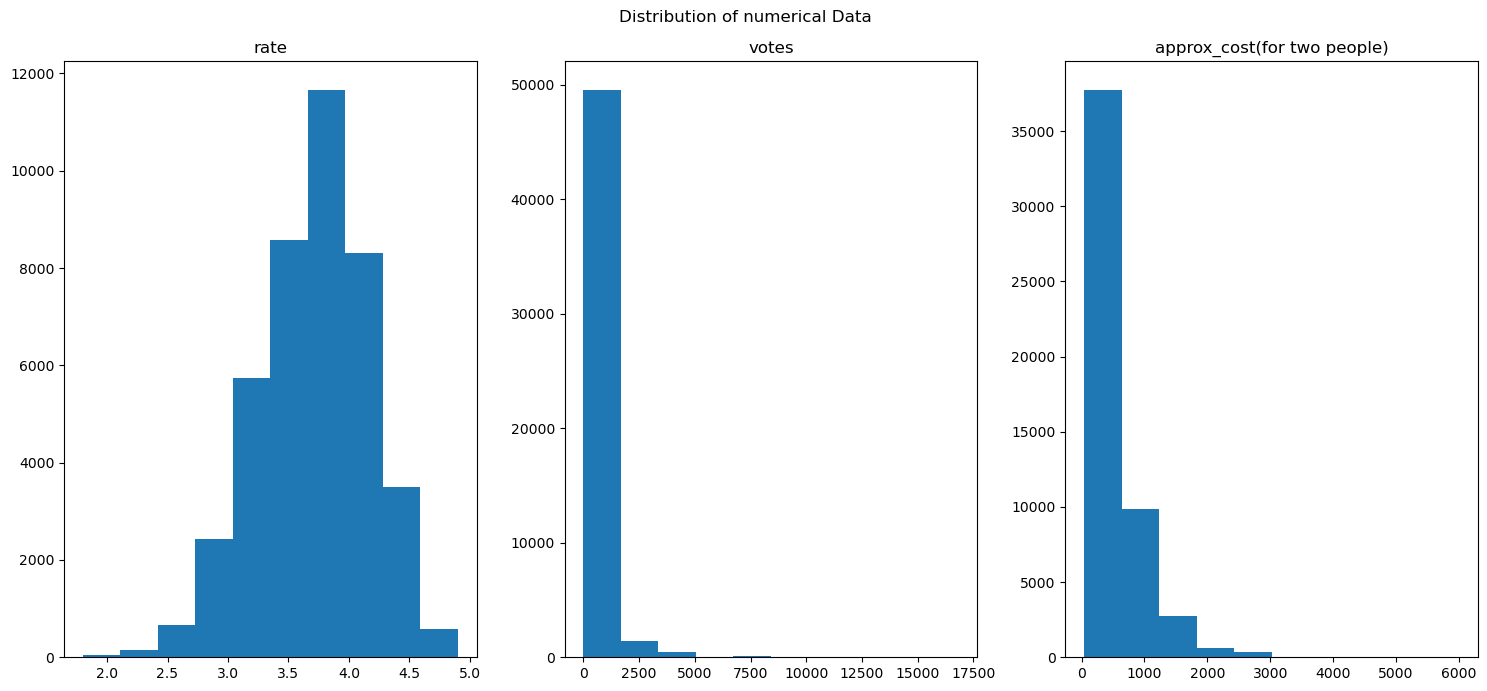

In [35]:
# Plot Distribution for numerical Data
data = ["rate","votes","approx_cost(for two people)"]
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):
    axs[i].hist(df[column].dropna() )
    axs[i].set_title(column)
fig.suptitle("Distribution of numerical Data")
plt.tight_layout()
plt.show()

From the first histogram: The most number of people rated the restaurant with a 4 out of 5
From the second histogram: The most number of people does not rate the restaurant
From the third histogram: The approx cost (for two people) is too low

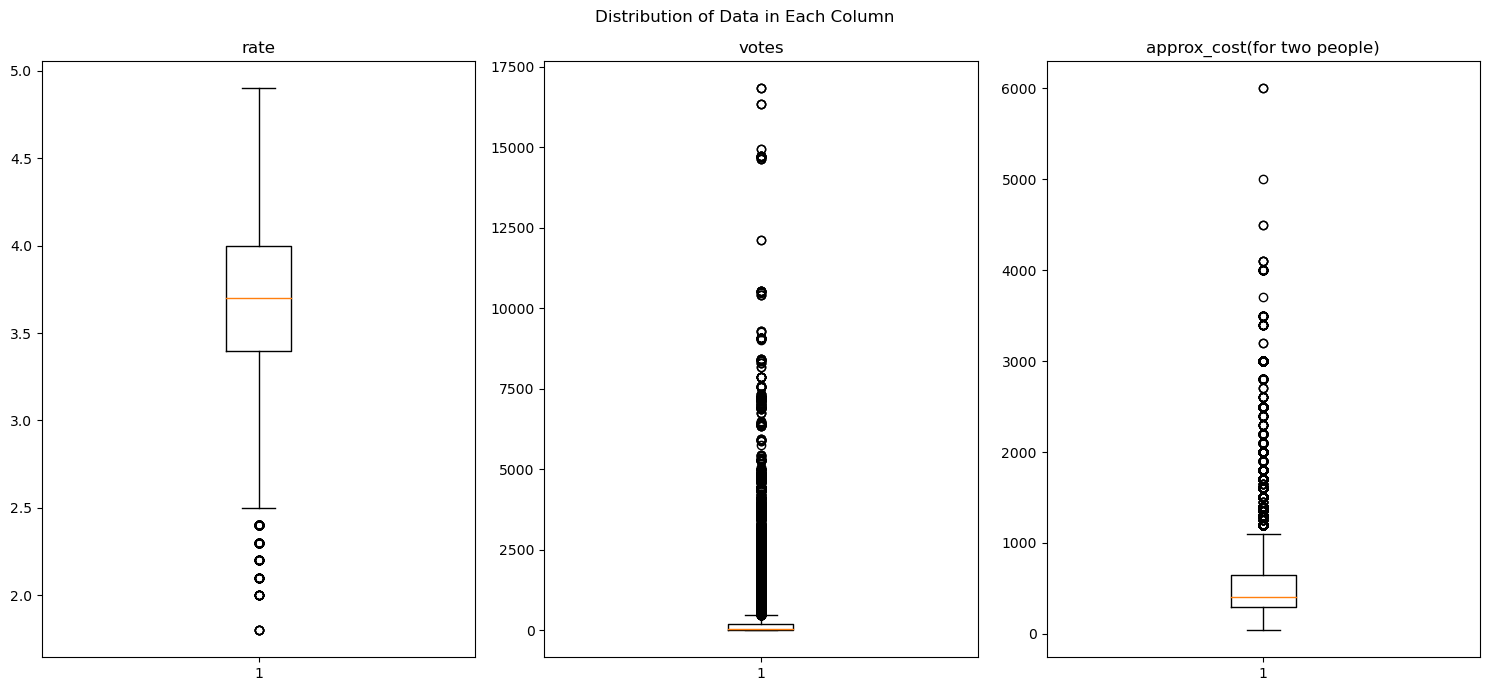

In [36]:
data = ["rate", "votes", "approx_cost(for two people)"]
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):  
    axs[i].boxplot(df[column].dropna())  
    axs[i].set_title(column)
    
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()


For the first boxplot: the outlier of the rate is from a rate of 2.5, the median value is about 3.75, the min value is 2.5 and the max one is about 4.9
For the second boxplot: the outlier is above zero a little bit
For the third boxplot: the outlier of the approx cost is above 1200, the min value is zero while the max is about 1200

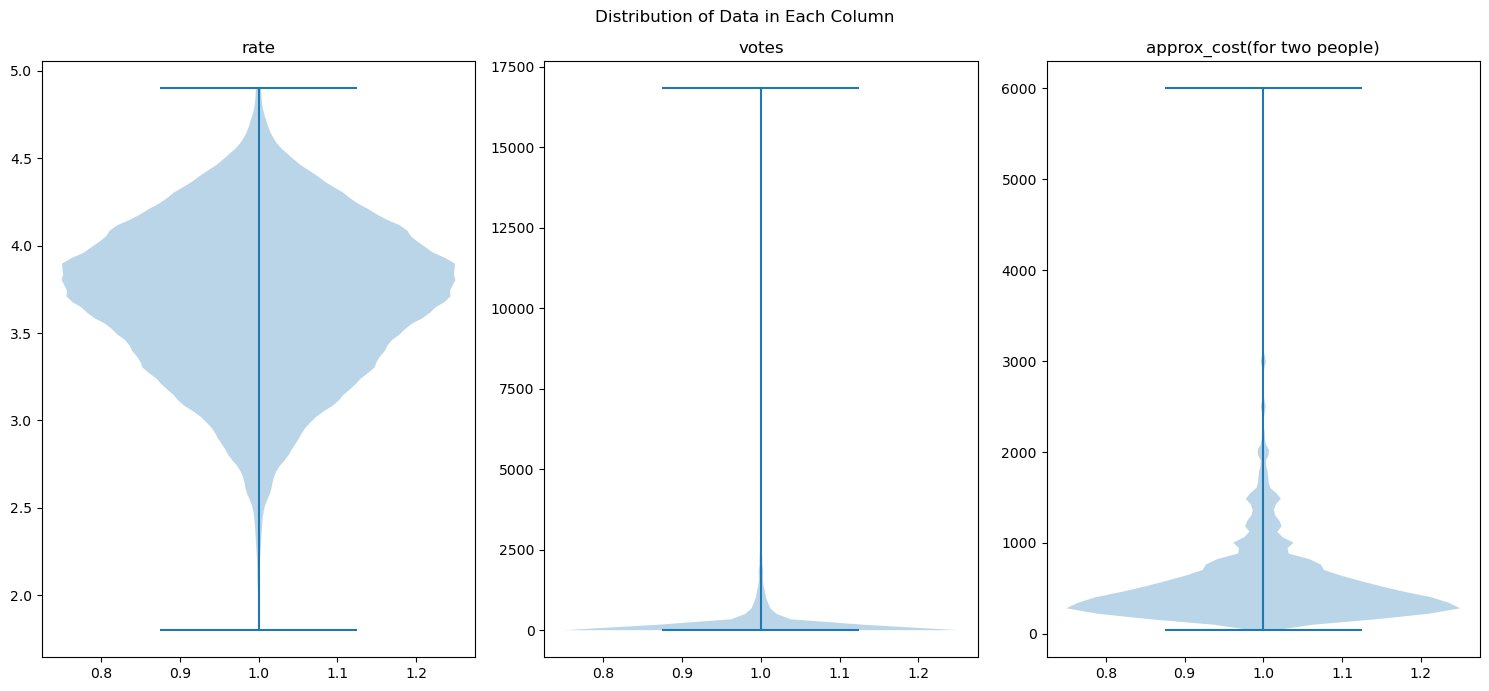

In [37]:
data = ["rate", "votes", "approx_cost(for two people)"]
fig, axs = plt.subplots(1, len(data), figsize=(15, 7))  

# Plot each column in a separate subplot
for i, column in enumerate(data):  
    axs[i].violinplot(df[column].dropna())  
    axs[i].set_title(column)
    
fig.suptitle("Distribution of Data in Each Column")
plt.tight_layout()
plt.show()


<code style="color: green;">For the first violinplot: the median value of the rate is at about 3.75.</code><br>
<code style="color: green;">For the second violinplot: the median value of the votes is above zero by a little numbers</code><br>
<code style="color: green;">For the third violinplot: the median value of the approx_cost is at about 200.</code><br>



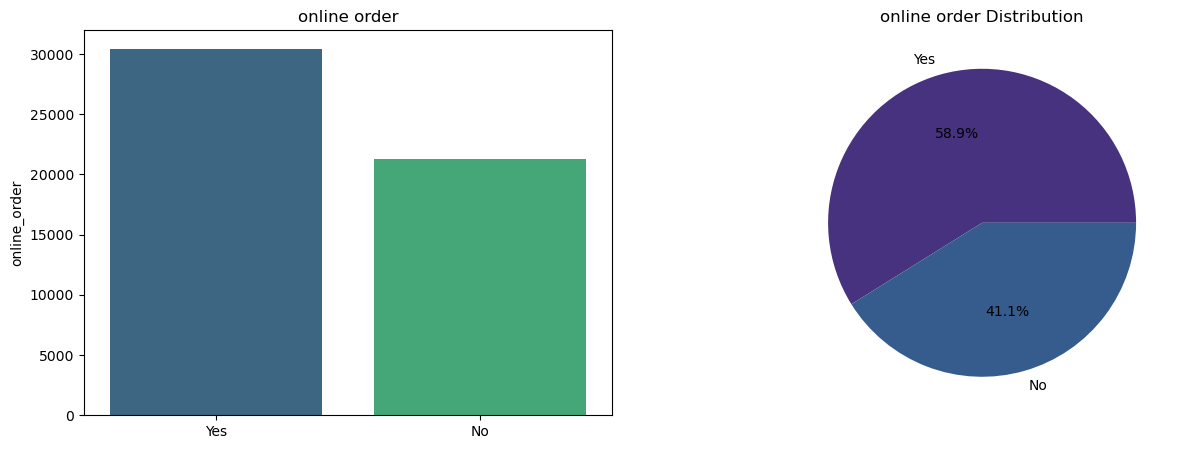

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

online_order_counts = df["online_order"].value_counts()

# Create a bar plot of online order
sns.barplot(x=online_order_counts.index, y=online_order_counts, palette="viridis", ax=ax[0])
ax[0].set_title('online order')

# Create a pie chart of type of online order
ax[1].pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[1].set_title('online order Distribution')

plt.show()


<code style="color: green;">Roughly 60% of individuals prefer purchasing takeaway meals.</code><br>


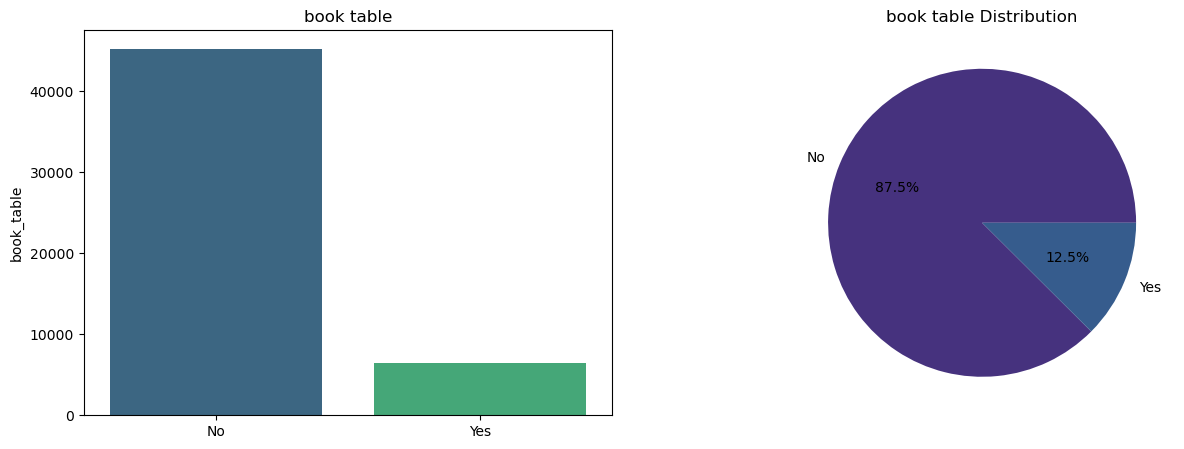

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

book_table_counts = df["book_table"].value_counts()

# Create a bar plot of online order
sns.barplot(x=book_table_counts.index, y=book_table_counts, palette="viridis", ax=ax[0])
ax[0].set_title('book table')

# Create a pie chart of type of online order
ax[1].pie(book_table_counts, labels=book_table_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[1].set_title('book table Distribution')

plt.show()


<code style="color: green;"> Approximately 87.5% of individuals prefer to reserve a table when dining.</code><br>


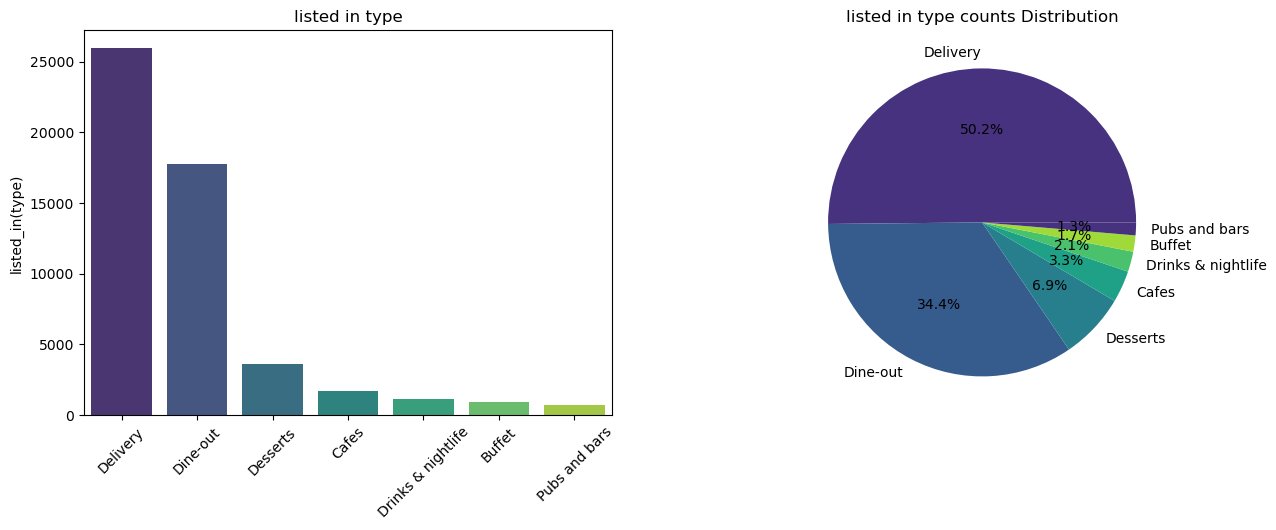

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

listed_in_type_counts = df["listed_in(type)"].value_counts()

# Create a bar plot of online order
sns.barplot(x=listed_in_type_counts.index, y=listed_in_type_counts, palette="viridis", ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('listed in type')

# Create a pie chart of type of online order
ax[1].pie(listed_in_type_counts, labels=listed_in_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[1].set_title('listed in type counts Distribution')


plt.show()


<code style="color: green;"> Most of service and restaurants in this city is delivery.</code><br>


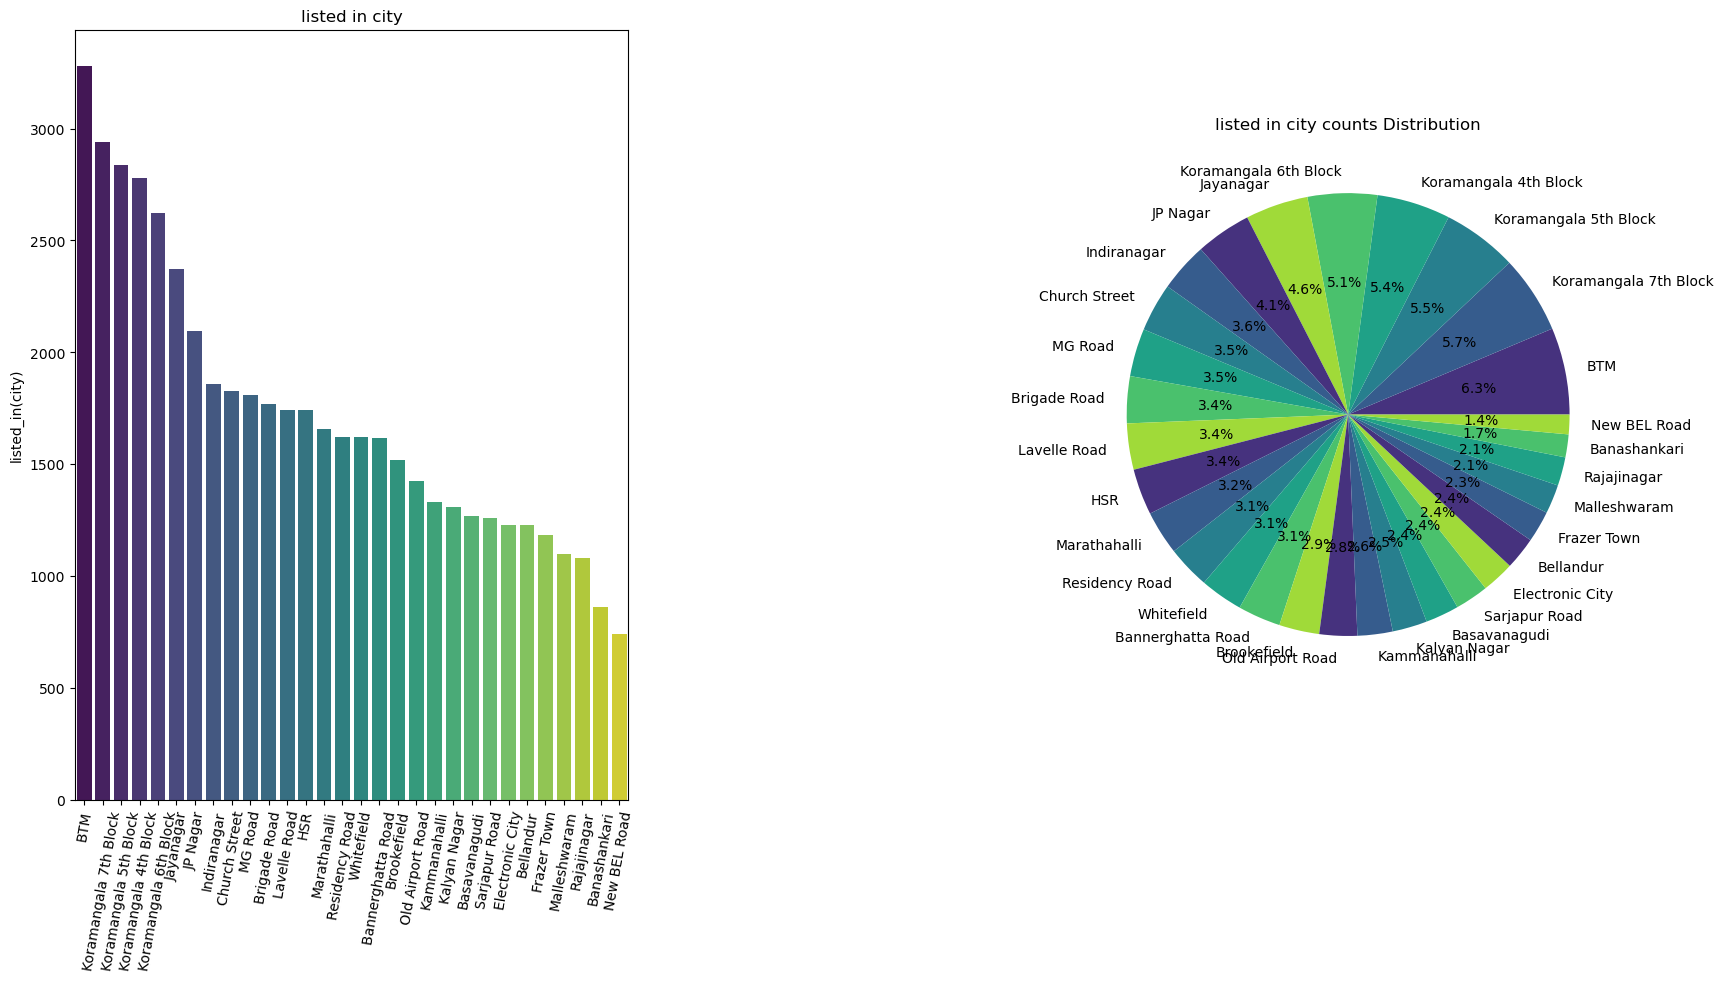

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

listed_in_city_counts = df["listed_in(city)"].value_counts()

# Create a bar plot of online order
sns.barplot(x=listed_in_city_counts.index, y=listed_in_city_counts, palette="viridis", ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=80)
ax[0].set_title('listed in city')

# Create a pie chart of type of online order
ax[1].pie(listed_in_city_counts, labels=listed_in_city_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
ax[1].set_title('listed in city counts Distribution')
ax[1].set_aspect('equal')  # Ensures the pie chart is circular
plt.subplots_adjust(wspace=0.8)

plt.show()


<code style="color: green;">There is a declining trend in distribution across all cities.</code><br>


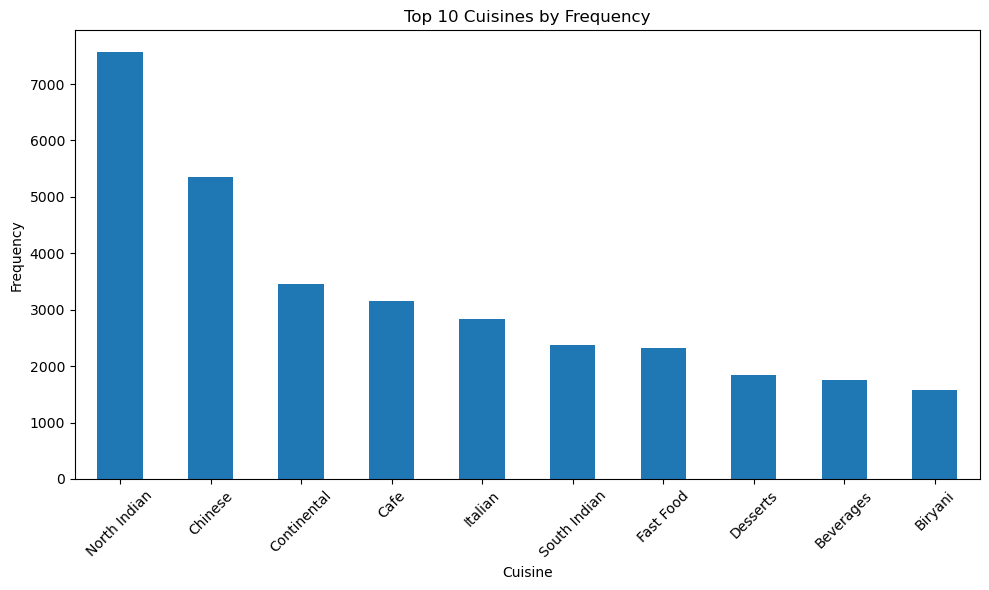

In [42]:
top_cuisine_counts = df_stacked['stacked_cuisines'].value_counts().head(10)
# Plotting the top 10 cuisines
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
top_cuisine_counts.plot(kind='bar')
plt.title('Top 10 Cuisines by Frequency')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<code style="color: green;">North Indian cuisine was the most frequently occurring.</code><br>


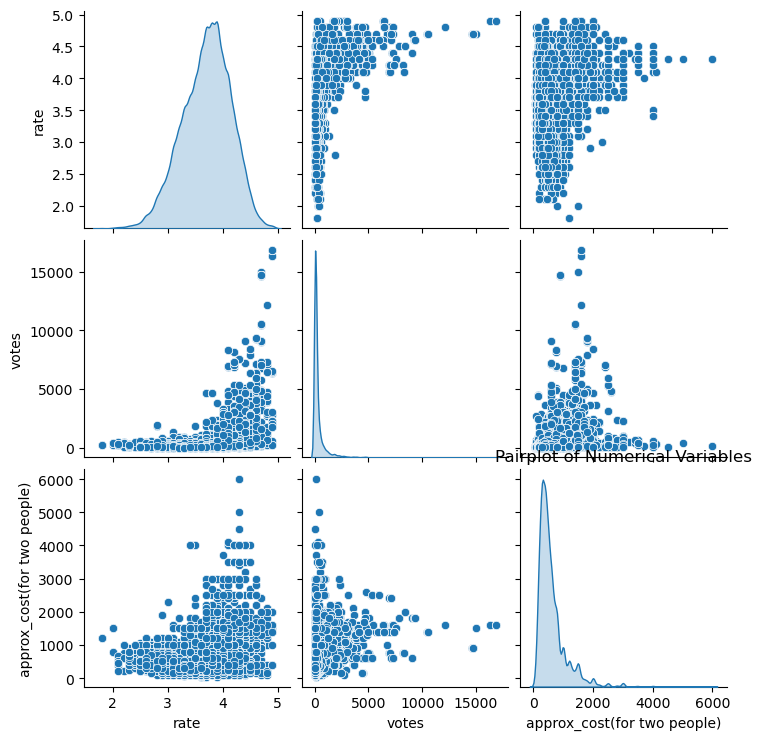

In [43]:
# Pairplot to visualize relationships among numerical variables
sns.pairplot(df[['rate', 'votes', 'approx_cost(for two people)']].dropna(), diag_kind='kde')
plt.title('Pairplot of Numerical Variables')
plt.show()



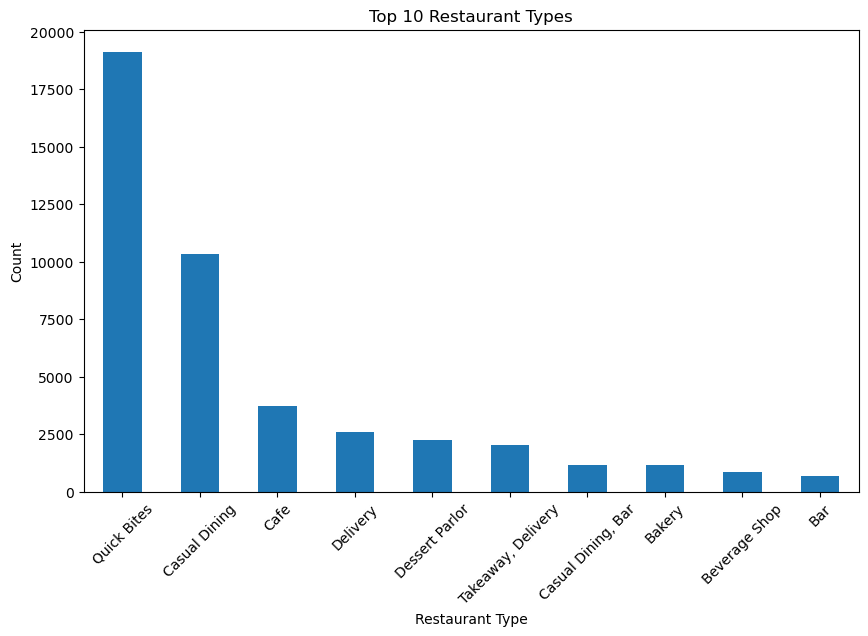

In [44]:
# counts of different types of restaurants
rest_type_counts = df['rest_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
rest_type_counts.head(10).plot(kind='bar')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<code style="color: green;">Quick Bites is the top restauarnt which is used very widely by a high difference in usage between the other 10 restaurant types 
</code><br>


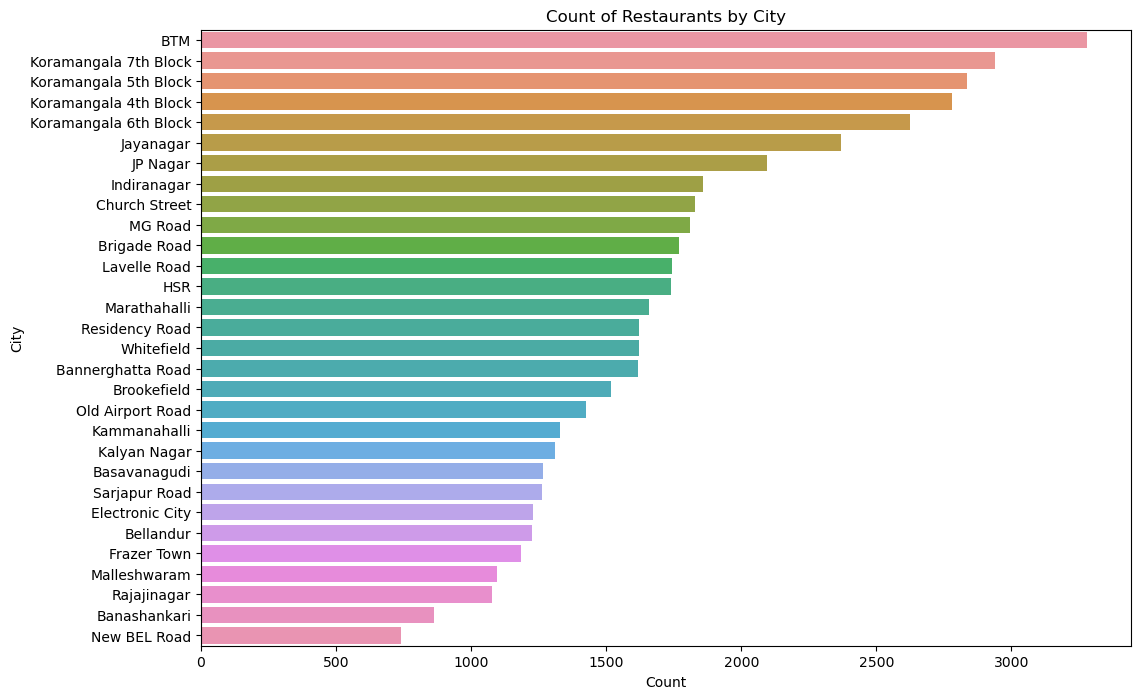

In [45]:
# Count of Restaurants by City
plt.figure(figsize=(12, 8))
sns.countplot(y='listed_in(city)', data=df, order=df['listed_in(city)'].value_counts().index)
plt.title('Count of Restaurants by City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

<code style="color: green;">The BTM area has a huge number of restauants. </code><br>


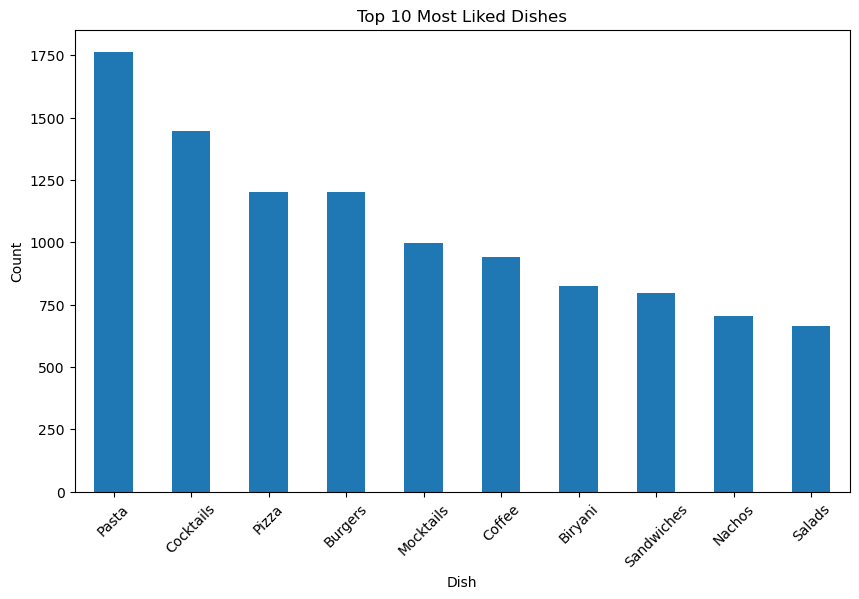

In [46]:
# Top 10 most liked dishes
top_liked_dishes = df_stacked['stacked_dish_liked'].value_counts().head(10)


# Visualize top liked dishes
plt.figure(figsize=(10, 6))
sns.set_palette("tab20")
top_liked_dishes.plot(kind='bar')
plt.title('Top 10 Most Liked Dishes')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<code style="color: green;">Pasta is the most liked dish from the top 10 dishes served at the restauarant.</code><br>


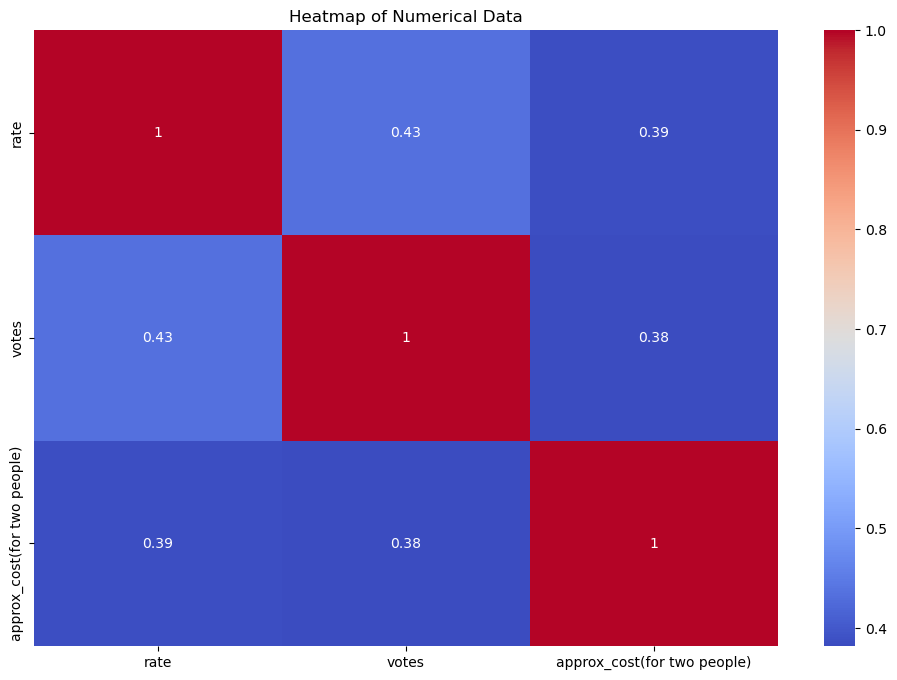

In [47]:
#heatmap to check corr
numercal_data=['rate', 'votes', 'approx_cost(for two people)']
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.heatmap(df[numercal_data].corr(), annot=True, cmap="coolwarm")

# Set the plot title
plt.title("Heatmap of Numerical Data")

# Display the heatmap
plt.show()

### <font color="blue">Bivariate Analysis.</font>

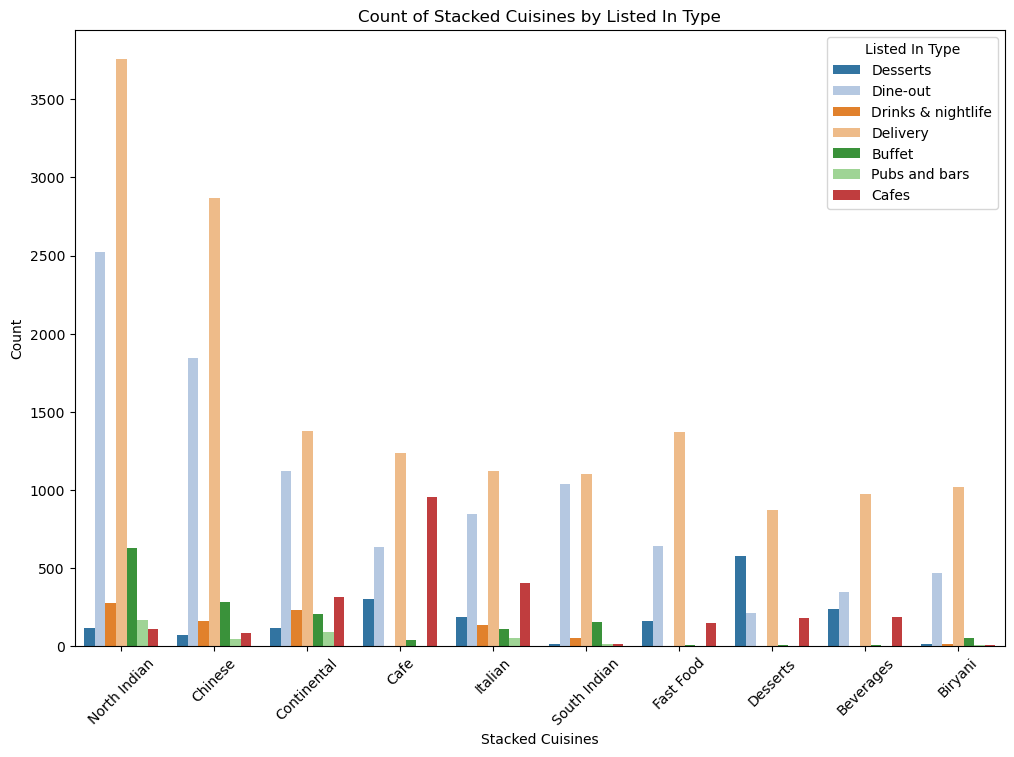

In [48]:
# Grouped count plot for stacked cuisines vs. type of resturant
plt.figure(figsize=(12, 8))
sns.set_palette("tab20")
sns.countplot(data=df_stacked, x='stacked_cuisines', hue='listed_in(type)', order=df_stacked['stacked_cuisines'].value_counts().iloc[:10].index)
plt.title('Count of Stacked Cuisines by Listed In Type')
plt.xlabel('Stacked Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Listed In Type')
plt.show()


<code style="color: green;">Delivery is the most preferable way of ordering .</code><br>


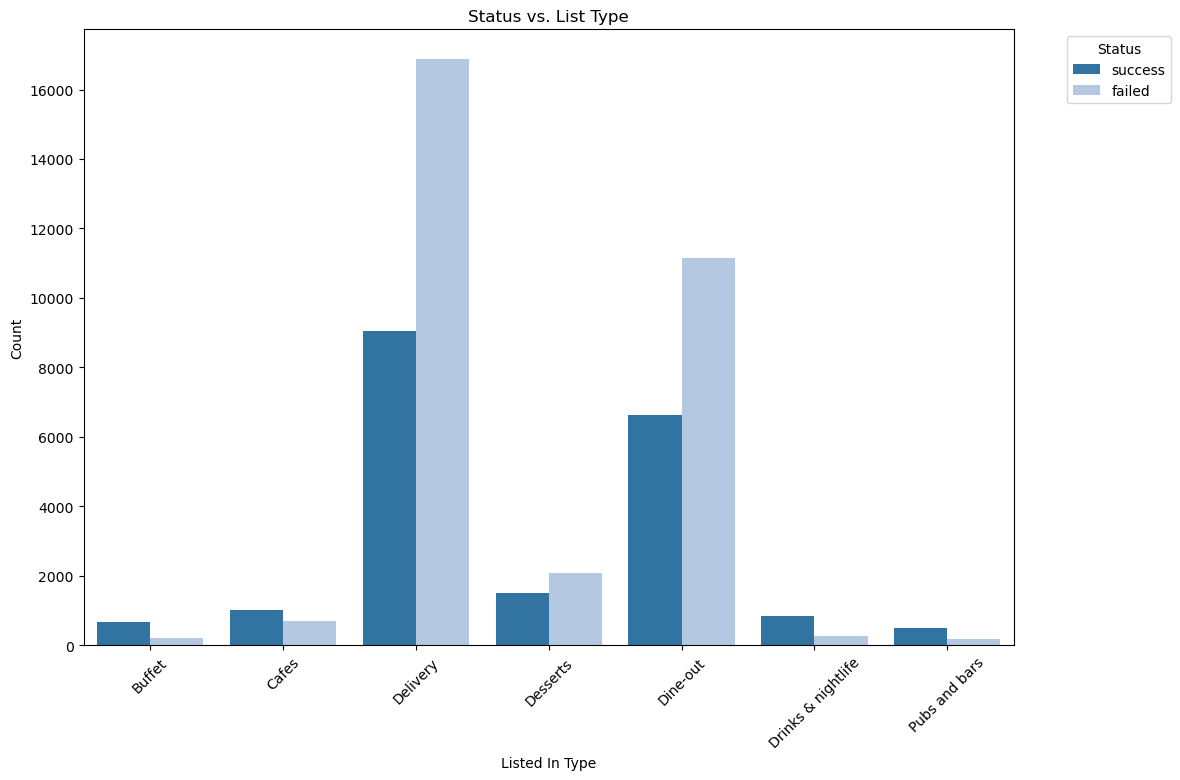

In [49]:
plt.figure(figsize=(12, 8))
sns.set_palette("tab20")
sns.countplot(df,x='listed_in(type)', hue='status')
plt.title('Status vs. List Type')
plt.xlabel('Listed In Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<code style="color: green;">As understood before, delievery is the most used manner but this illustration indicates that many of them is failed in comparison with the success counts of delivery.</code><br>


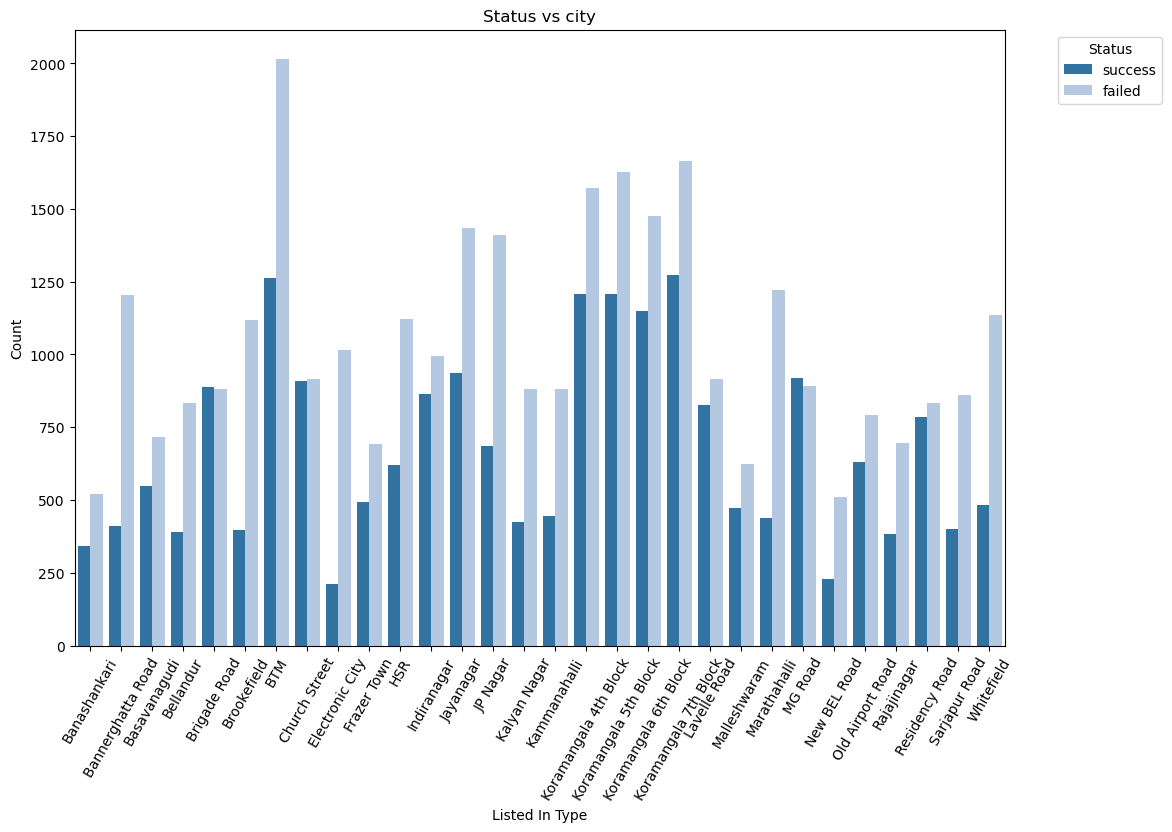

In [50]:
plt.figure(figsize=(12, 8))
sns.set_palette("tab20")
sns.countplot(df,x='listed_in(city)', hue='status')
plt.title('Status vs city')
plt.xlabel('Listed In Type')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<code style="color: green;">Here the BTM is the area that has the huge number of restaurants but its status of failure exceeds that of success.</code><br>


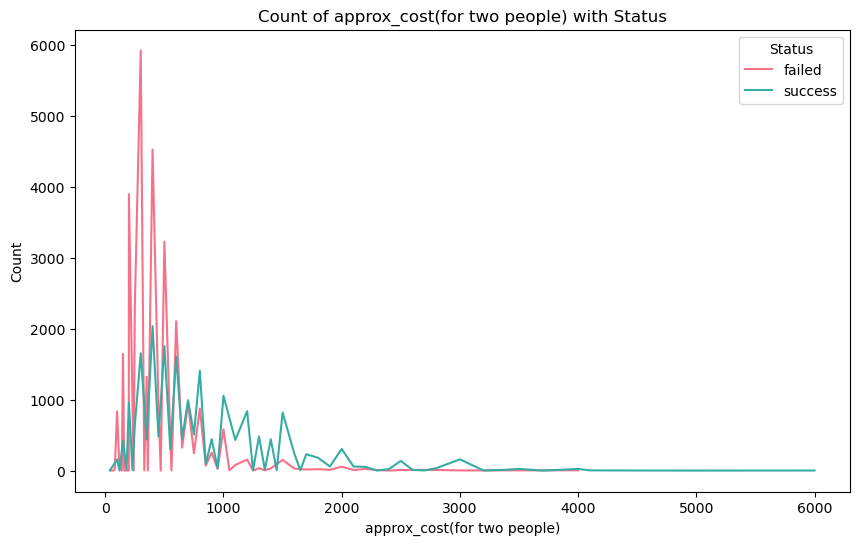

In [51]:
# Count number of occurrences for each 'approx_cost(for two people)' with 'status'
cost_status_count = df.groupby(['approx_cost(for two people)', 'status']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=cost_status_count, x='approx_cost(for two people)', y='count', hue='status',palette='husl')
plt.title('Count of approx_cost(for two people) with Status')
plt.xlabel('approx_cost(for two people)')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()


<code style="color: green;">The failed status among the approx_cost is significantly greater that the success status.</code><br>


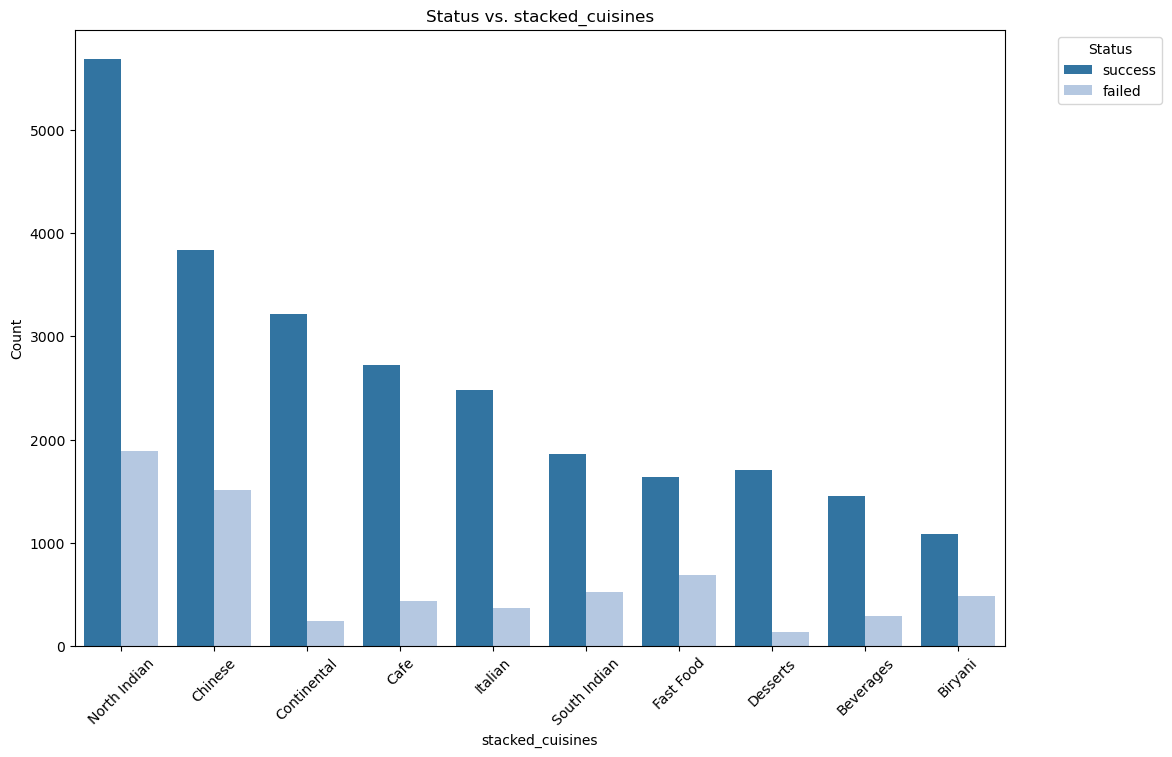

In [52]:
cont_stacked_cuisine = df_stacked["stacked_cuisines"].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.set_palette("tab20")
sns.countplot(data=df_stacked, x='stacked_cuisines', hue='status', order=cont_stacked_cuisine.index)
plt.title('Status vs. stacked_cuisines')
plt.xlabel('stacked_cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



<code style="color: green;">As indicates before North Indian Cuisine is the most served plate and fortunately its success status is much higher than that of its failure.</code><br>


### handling outliers

In [53]:
for column in df[["rate","votes","approx_cost(for two people)"]]:

    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1, q3 = np.percentile(df_stacked[column], [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Set the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the median value (Q2)
    df_stacked[column] = np.where((df_stacked[column] < lower_bound) | (df_stacked[column] > upper_bound), np.median(df_stacked[column]), df_stacked[column])

### pipline modeling

In [54]:
#Drop the columns that do not enter the model
df_stacked.drop(["name","votes","rate","stacked_dish_liked"],axis=1,inplace=True)

In [55]:
df_stacked

,online_order,book_table,location,approx_cost(for two people),listed_in(type),listed_in(city),status,stacked_cuisines,stacked_rest_type
0,Yes,No,Jayanagar,150.0,Desserts,Basavanagudi,success,Desserts,Dessert Parlor
1,Yes,No,Jayanagar,750.0,Dine-out,Basavanagudi,success,Chinese,Casual Dining
2,Yes,Yes,Sarjapur Road,1200.0,Drinks & nightlife,Bellandur,success,American,Pub
3,Yes,Yes,Sarjapur Road,1300.0,Dine-out,Bellandur,success,Chinese,Pub
4,Yes,Yes,Ulsoor,1200.0,Dine-out,Brigade Road,success,Italian,Casual Dining
...,...,...,...,...,...,...,...,...,...
51712,Yes,Yes,Sarjapur Road,1400.0,Delivery,Bellandur,success,Seafood,Bar
51713,Yes,Yes,Jayanagar,1200.0,Delivery,Basavanagudi,success,Pizza,Pub
51714,No,No,Bannerghatta Road,250.0,Delivery,Bannerghatta Road,success,Bakery,Bakery
51715,Yes,No,BTM,400.0,Delivery,Basavanagudi,success,Fast Food,Casual Dining


In [56]:
maping_status={
    "failed":0,
    "success":1
}
df_stacked["status"]=df_stacked["status"].replace(maping_status)

In [57]:
new_column_names = {
    'listed_in(city)': 'city',
    'listed_in(type)': 'category',
    'approx_cost(for two people)': 'approx_cost'
}

df_stacked = df_stacked.rename(columns=new_column_names)

In [58]:
df_stacked

,online_order,book_table,location,approx_cost,category,city,status,stacked_cuisines,stacked_rest_type
0,Yes,No,Jayanagar,150.0,Desserts,Basavanagudi,1,Desserts,Dessert Parlor
1,Yes,No,Jayanagar,750.0,Dine-out,Basavanagudi,1,Chinese,Casual Dining
2,Yes,Yes,Sarjapur Road,1200.0,Drinks & nightlife,Bellandur,1,American,Pub
3,Yes,Yes,Sarjapur Road,1300.0,Dine-out,Bellandur,1,Chinese,Pub
4,Yes,Yes,Ulsoor,1200.0,Dine-out,Brigade Road,1,Italian,Casual Dining
...,...,...,...,...,...,...,...,...,...
51712,Yes,Yes,Sarjapur Road,1400.0,Delivery,Bellandur,1,Seafood,Bar
51713,Yes,Yes,Jayanagar,1200.0,Delivery,Basavanagudi,1,Pizza,Pub
51714,No,No,Bannerghatta Road,250.0,Delivery,Bannerghatta Road,1,Bakery,Bakery
51715,Yes,No,BTM,400.0,Delivery,Basavanagudi,1,Fast Food,Casual Dining


In [59]:
df_stacked.to_csv("input_data.csv",index=False)

In [60]:
columns_to_map = ["location", "city", "stacked_rest_type", "stacked_cuisines", "category"]
ordinal_cols = ['online_order', 'book_table']  
ordinal_categories = {
    'online_order': ['No', 'Yes'], 
    'book_table': ['No', 'Yes']   
}
ordinal_encoder = OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_cols])
# Define a function to generate mappings for each column
def generate_mapping(column):
    return {j: i for i, j in enumerate(column.unique())}

# Custom function to apply the mappings
def apply_mapping(data, mapping):
    for col, map_dict in mapping.items():
        data[col] = data[col].map(map_dict)
    return data

# Generate mappings for each column
mappings = {col: generate_mapping(df_stacked[col]) for col in columns_to_map}
 
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_imputer', SimpleImputer(strategy='mean'), ["approx_cost"]),
        ('map_columns', FunctionTransformer(apply_mapping, kw_args={'mapping': mappings}), columns_to_map),
        ('ordinal', ordinal_encoder, ordinal_cols),
    ],
    remainder='passthrough'
)

In [61]:
mappings

{'location': {'Jayanagar': 0,
  'Sarjapur Road': 1,
  'Ulsoor': 2,
  'Richmond Road': 3,
  'Shivajinagar': 4,
  'Bellandur': 5,
  'Bannerghatta Road': 6,
  'Marathahalli': 7,
  'Banashankari': 8,
  'MG Road': 9,
  'Residency Road': 10,
  'HSR': 11,
  'Church Street': 12,
  'South Bangalore': 13,
  'Lavelle Road': 14,
  'JP Nagar': 15,
  'Brigade Road': 16,
  'Indiranagar': 17,
  'BTM': 18,
  'Cunningham Road': 19,
  'Basavanagudi': 20,
  'Race Course Road': 21,
  'Frazer Town': 22,
  'Commercial Street': 23,
  'Shanti Nagar': 24,
  'Mysore Road': 25,
  'St. Marks Road': 26,
  'Vasanth Nagar': 27,
  'Infantry Road': 28,
  'Domlur': 29,
  'Kumaraswamy Layout': 30,
  'City Market': 31,
  'Wilson Garden': 32,
  'Old Airport Road': 33,
  'Ejipura': 34,
  'Rajarajeshwari Nagar': 35,
  'Koramangala 8th Block': 36,
  'East Bangalore': 37,
  'Uttarahalli': 38,
  'Koramangala 1st Block': 39,
  'Koramangala 6th Block': 40,
  'Koramangala 5th Block': 41,
  'Langford Town': 42,
  'Vijay Nagar': 43,

In [ ]:
#data = data[:350000]
data

In [62]:
X = df_stacked.drop("status", axis=1)
y = df_stacked["status"]

In [63]:
models = {
    
    "RandomForest":RandomForestClassifier(),
    "XGB":XGBClassifier(),
    "LGBM":LGBMClassifier(),
    "GaussianNB":GaussianNB(),
    "Knn":KNeighborsClassifier()  
}

In [64]:
for model_name, model_instance in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model_instance )
    ])

    # Fit and evaluate the pipeline using cross-validation
    scores = cross_validate(pipeline, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score:", scores["train_score"].mean())
    print("Test F1-score:", scores["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score: 0.9866482680418261
Test F1-score: 0.9811447523471338
_________________________
XGB
Train F1-score: 0.9733463759902021
Test F1-score: 0.9690845391116583
_________________________
LGBM
Train F1-score: 0.9600095275017908
Test F1-score: 0.9578548003249712
_________________________
GaussianNB
Train F1-score: 0.7798771700002259
Test F1-score: 0.7796427572601836
_________________________
Knn
Train F1-score: 0.9801209405067091
Test F1-score: 0.9729602031981701
_________________________


In [65]:
for model_name, model_instance in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scalr', StandardScaler()),
        ('model', model_instance )
    ])

    # Fit and evaluate the pipeline using cross-validation
    scores = cross_validate(pipeline, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score:", scores["train_score"].mean())
    print("Test F1-score:", scores["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score: 0.986648254437464
Test F1-score: 0.9810732344152611
_________________________
XGB
Train F1-score: 0.9733463759902021
Test F1-score: 0.9690845391116583
_________________________
LGBM
Train F1-score: 0.9600095275017908
Test F1-score: 0.9578548003249712
_________________________
GaussianNB
Train F1-score: 0.7793761385551986
Test F1-score: 0.7791051432620016
_________________________
Knn
Train F1-score: 0.9794169621705586
Test F1-score: 0.9719841396857196
_________________________


In [66]:
for model_name, model_instance in models.items():
    # Create an imbalanced-learn Pipeline including SMOTE
    pipeline_imbalanced = Pipeline([
        ('preprocessor', preprocessor), 
        ('smote', SMOTE()),    
        ('model', model_instance)  
    ])

    # Fit and evaluate the imbalanced pipeline using cross-validation
    scores_imbalanced = cross_validate(pipeline_imbalanced, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score (with SMOTE):", scores_imbalanced["train_score"].mean())
    print("Test F1-score (with SMOTE):", scores_imbalanced["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score (with SMOTE): 0.9827614048727105
Test F1-score (with SMOTE): 0.9794058604842167
_________________________
XGB
Train F1-score (with SMOTE): 0.9567204012665623
Test F1-score (with SMOTE): 0.9529530798956104
_________________________
LGBM
Train F1-score (with SMOTE): 0.9296602224932574
Test F1-score (with SMOTE): 0.9266487522388065
_________________________
GaussianNB
Train F1-score (with SMOTE): 0.6402885270188596
Test F1-score (with SMOTE): 0.6402706188361333
_________________________
Knn
Train F1-score (with SMOTE): 0.9833522336346364
Test F1-score (with SMOTE): 0.9774506374819143
_________________________


In [67]:
for model_name, model_instance in models.items():
    # Create an imbalanced-learn Pipeline including SMOTE
    pipeline_imbalanced = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE()), 
        ('scaler' , StandardScaler()),
        ('model', model_instance)  
    ])

    # Fit and evaluate the imbalanced pipeline using cross-validation
    scores_imbalanced = cross_validate(pipeline_imbalanced, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score (with SMOTE):", scores_imbalanced["train_score"].mean())
    print("Test F1-score (with SMOTE):", scores_imbalanced["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score (with SMOTE): 0.9828820364730628
Test F1-score (with SMOTE): 0.9793875823114584
_________________________
XGB
Train F1-score (with SMOTE): 0.9578249655403661
Test F1-score (with SMOTE): 0.9541196217028525
_________________________
LGBM
Train F1-score (with SMOTE): 0.9273444360824301
Test F1-score (with SMOTE): 0.9239366643642665
_________________________
GaussianNB
Train F1-score (with SMOTE): 0.6401817507036325
Test F1-score (with SMOTE): 0.6402396800659049
_________________________
Knn
Train F1-score (with SMOTE): 0.9825569715500174
Test F1-score (with SMOTE): 0.9758418699692297
_________________________


In [68]:
for model_name, model_instance in models.items():
    # Create an imbalanced-learn Pipeline including SMOTETomek
    pipeline_imbalanced = Pipeline([
        ('preprocessor', preprocessor), 
        ('smotetomek', SMOTETomek()),    
        ('model', model_instance)  
    ])

    # Fit and evaluate the imbalanced pipeline using cross-validation
    scores_imbalanced = cross_validate(pipeline_imbalanced, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score (with SMOTETomek):", scores_imbalanced["train_score"].mean())
    print("Test F1-score (with SMOTETomek):", scores_imbalanced["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score (with SMOTETomek): 0.982782862710058
Test F1-score (with SMOTETomek): 0.9793703478400012
_________________________
XGB
Train F1-score (with SMOTETomek): 0.9574878029545596
Test F1-score (with SMOTETomek): 0.9538724421941763
_________________________
LGBM
Train F1-score (with SMOTETomek): 0.9288740912426705
Test F1-score (with SMOTETomek): 0.9261143864626223
_________________________
GaussianNB
Train F1-score (with SMOTETomek): 0.6404818011736172
Test F1-score (with SMOTETomek): 0.6405089366946564
_________________________
Knn
Train F1-score (with SMOTETomek): 0.9834174976189448
Test F1-score (with SMOTETomek): 0.9774587692572982
_________________________


In [69]:
for model_name, model_instance in models.items():
    # Create an imbalanced-learn Pipeline including SMOTETomek
    pipeline_imbalanced = Pipeline([
        ('preprocessor', preprocessor),
        ('smotetomek', SMOTETomek()),
        ('scaler' , StandardScaler()),
        ('model', model_instance)  
    ])

    # Fit and evaluate the imbalanced pipeline using cross-validation
    scores_imbalanced = cross_validate(pipeline_imbalanced, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score (with SMOTETomek):", scores_imbalanced["train_score"].mean())
    print("Test F1-score (with SMOTETomek):", scores_imbalanced["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score (with SMOTETomek): 0.9827544624432948
Test F1-score (with SMOTETomek): 0.9795145239759367
_________________________
XGB
Train F1-score (with SMOTETomek): 0.9578068583945841
Test F1-score (with SMOTETomek): 0.9541912194177407
_________________________
LGBM
Train F1-score (with SMOTETomek): 0.924942715106979
Test F1-score (with SMOTETomek): 0.9216764088442055
_________________________
GaussianNB
Train F1-score (with SMOTETomek): 0.640423503036302
Test F1-score (with SMOTETomek): 0.6404424797813032
_________________________
Knn
Train F1-score (with SMOTETomek): 0.9826257520368937
Test F1-score (with SMOTETomek): 0.975607892514355
_________________________


In [70]:
for model_name, model_instance in models.items():
    # Create an imbalanced-learn Pipeline including Tomek Links
    pipeline_imbalanced = Pipeline([
        ('preprocessor', preprocessor), 
        ('tomelinks', TomekLinks()),  
        ('model', model_instance)  
    ])


    # Fit and evaluate the imbalanced pipeline using cross-validation
    scores_imbalanced = cross_validate(pipeline_imbalanced, X, y, cv=10, scoring="f1", n_jobs=-1, return_train_score=True)
    print(model_name)
    print("Train F1-score (with TomekLinks()):", scores_imbalanced["train_score"].mean())
    print("Test F1-score (with TomekLinks()):", scores_imbalanced["test_score"].mean())
    print("_"*25)

RandomForest
Train F1-score (with TomekLinks()): 0.9866308550002337
Test F1-score (with TomekLinks()): 0.9810732711179057
_________________________
XGB
Train F1-score (with TomekLinks()): 0.9736679593467436
Test F1-score (with TomekLinks()): 0.9702589708113942
_________________________
LGBM
Train F1-score (with TomekLinks()): 0.9600247349591706
Test F1-score (with TomekLinks()): 0.9570983693178411
_________________________
GaussianNB
Train F1-score (with TomekLinks()): 0.7797515182550632
Test F1-score (with TomekLinks()): 0.7795615386672248
_________________________
Knn
Train F1-score (with TomekLinks()): 0.9800120038698381
Test F1-score (with TomekLinks()): 0.9729143013637792
_________________________


 GradientBoosting

In [71]:
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('tomelinks', TomekLinks()),  
    ('model', GradientBoostingClassifier())  
])
scores = cross_validate(pipeline, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9177154224446552
Test F1-score: 0.9172426996381638
_________________________


In [72]:
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('tomelinks', TomekLinks()),  
    ('model', CatBoostClassifier())  
])
scores = cross_validate(pipeline, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.973106624468042
Test F1-score: 0.969565356406728
_________________________


voting

In [73]:
# Initialize individual classifiers
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)], voting='hard')

pipeline_votig = Pipeline([
    ('preprocessor', preprocessor),
    ('TomekLinks', TomekLinks()),
    ("scaler" , StandardScaler()),        
    ('model', voting_clf )
])

scores = cross_validate(pipeline_votig, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9868797921985795
Test F1-score: 0.98101167648325
_________________________


In [74]:
# Initialize individual classifiers
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)], voting='hard')

pipeline_votig = Pipeline([
    ('preprocessor', preprocessor),
    ("scaler" , StandardScaler()),
    #('TomekLinks', TomekLinks()),    
    ('model', voting_clf )
])

scores = cross_validate(pipeline_votig, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9868914982783161
Test F1-score: 0.9810956408775574
_________________________


stack

In [75]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=10,
                                  min_samples_split=10, n_estimators=50)),
    ('lr', DecisionTreeClassifier())
]

# Initialize stacking classifier with meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

pipeline_stacking = Pipeline([
    ('preprocessor', preprocessor),
    ('TomekLinks', TomekLinks()),
    ("scaler" , StandardScaler()),
    ('model', stacking_model )
])

scores = cross_validate(pipeline_stacking, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.986780501561243
Test F1-score: 0.9817309979971419
_________________________


In [76]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=10,
                                  min_samples_split=10, n_estimators=50)),
    ('lr', KNeighborsClassifier())
]

# Initialize stacking classifier with meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

pipeline_stacking = Pipeline([
    ('preprocessor', preprocessor),
    ("scaler" , StandardScaler()),
    #('TomekLinks', TomekLinks()),    
    ('model', stacking_model )
])

scores = cross_validate(pipeline_stacking, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9778935866120578
Test F1-score: 0.9690243310221025
_________________________


In [77]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=10,
                                  min_samples_split=10, n_estimators=50)),
    ('lr', LogisticRegression()),
    ("knn" , KNeighborsClassifier(n_neighbors=4))
]

# Initialize stacking classifier with meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

pipeline_stacking = Pipeline([
    ('preprocessor', preprocessor),
    ("scaler" , StandardScaler()),
    ('TomekLinks', TomekLinks()),    
    ('model', stacking_model )
])

scores = cross_validate(pipeline_stacking, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9796178886872751
Test F1-score: 0.9719168518013366
_________________________


RandomizedSearchCV

In [78]:
#improve RandomForestClassifier with gridsearch
pipeline_imbalanced = Pipeline([
    ('preprocessor', preprocessor),
    ('smote_tomek', SMOTETomek()),
    ('model', RandomForestClassifier())
])

# Define the hyperparameter search space for RandomForestClassifier
param_random = {
    'smote_tomek__sampling_strategy': ['auto', 'all', 'not minority'],
    'model__n_estimators': [10, 50, 100, 150, 200],
    'model__max_depth': [None] + list(range(5, 20)),
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 5, 10],
    'model__max_features': ['auto', 'sqrt']
}


random_search = RandomizedSearchCV(pipeline_imbalanced,param_random,cv=10,scoring='f1',n_jobs=-1 ,return_train_score=True)


# Fit the BayesSearchCV 
random_search.fit(X, y)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric_imputer',
                                                                               SimpleImputer(),
                                                                               ['approx_cost']),
                                                                              ('map_columns',
                                                                               FunctionTransformer(func=<function apply_mapping at 0x0000023503FF47C0>,
                                                                                                   kw_args={'mapping': {'category': {'Buffet': 4,
                                                                                                                                     'Cafes': 6,
                                                                                                                                     'Delivery': 3,
                                                                                                                                     'Desserts': 0,
                                                                                                                                     'Dine-out': 1...
                   n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14, 15, 16, 17, 18,
                                                             19],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [1, 5, 10],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [10, 50, 100,
                                                                150, 200],
                                        'smote_tomek__sampling_strategy': ['auto',
                                                                           'all',
                                                                           'not '
                                                                           'minority']},
                   return_train_score=True, scoring='f1')

In [79]:
random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_imputer',
                                                  SimpleImputer(),
                                                  ['approx_cost']),
                                                 ('map_columns',
                                                  FunctionTransformer(func=<function apply_mapping at 0x0000023503FF47C0>,
                                                                      kw_args={'mapping': {'category': {'Buffet': 4,
                                                                                                        'Cafes': 6,
                                                                                                        'Delivery': 3,
                                                                                                        'Desserts': 0,
                                                                                                        'Dine-out': 1,
                                                                                                        'Drinks & nightlife': 2,
                                                                                                        'Pubs and bars'...
                                                                                                                 'Pub': 2,
                                                                                                                 'Quick Bites': 6,
                                                                                                                 'Sweet Shop': 14,
                                                                                                                 'Takeaway': 11}}}),
                                                  ['location', 'city',
                                                   'stacked_rest_type',
                                                   'stacked_cuisines',
                                                   'category']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['online_order',
                                                   'book_table'])])),
                ('smote_tomek', SMOTETomek(sampling_strategy='all')),
                ('model',
                 RandomForestClassifier(min_samples_split=10,
                                        n_estimators=50))])

In [80]:
random_search.cv_results_["mean_train_score"]

array([0.9779013 , 0.7653054 , 0.92789208, 0.92625505, 0.94940573,
       0.86873263, 0.94853338, 0.8336844 , 0.98229308, 0.96092295])

In [81]:
random_search.cv_results_["mean_test_score"].mean()

0.9113557445768453

bagging

In [82]:
#bagging
pipeline_bagg = Pipeline([
    ('preprocessor', preprocessor),
    ("scaler" , StandardScaler()),
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42))
])

scores = cross_validate(pipeline_bagg, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.98670150483681
Test F1-score: 0.98169743016407
_________________________


In [83]:
#bagging
pipeline_bagg = Pipeline([
    ('preprocessor', preprocessor),
    ("scaler" , StandardScaler()),
    ('bagging', BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=24))
])

scores = cross_validate(pipeline_bagg, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9864404932722044
Test F1-score: 0.9803110769859813
_________________________


In [84]:
#bagging
pipeline_bagg = Pipeline([
    ('preprocessor', preprocessor),
    ("scaler" , StandardScaler()),
    ('bagging', BaggingClassifier(base_estimator=KNeighborsClassifier()))
])

scores = cross_validate(pipeline_bagg, X, y, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
print("Train F1-score:", scores["train_score"].mean())
print("Test F1-score:", scores["test_score"].mean())
print("_"*25)

Train F1-score: 0.9794615675367488
Test F1-score: 0.9693255596176733
_________________________


## chosen  model

In [85]:
base_models = [
    ('rf', RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=10,
                                  min_samples_split=10, n_estimators=50)),
    ('lr', DecisionTreeClassifier())
]

# Initialize stacking classifier with meta-learner
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

pipeline_stacking = Pipeline([
    ('preprocessor', preprocessor),
    ('TomekLinks', TomekLinks()),
    ("scaler" , StandardScaler()),
    ('model', stacking_model )
])

pipeline_stacking.fit(X[:500000],y[:500000])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_imputer',
                                                  SimpleImputer(),
                                                  ['approx_cost']),
                                                 ('map_columns',
                                                  FunctionTransformer(func=<function apply_mapping at 0x0000023503FF47C0>,
                                                                      kw_args={'mapping': {'category': {'Buffet': 4,
                                                                                                        'Cafes': 6,
                                                                                                        'Delivery': 3,
                                                                                                        'Desserts': 0,
                                                                                                        'Dine-out': 1,
                                                                                                        'Drinks & nightlife': 2,
                                                                                                        'Pubs and bars'...
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes']]),
                                                  ['online_order',
                                                   'book_table'])])),
                ('TomekLinks', TomekLinks()), ('scaler', StandardScaler()),
                ('model',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier(max_depth=7,
                                                                        min_samples_leaf=10,
                                                                        min_samples_split=10,
                                                                        n_estimators=50)),
                                                ('lr',
                                                 DecisionTreeClassifier())],
                                    final_estimator=LogisticRegression()))])

In [86]:
list(pipeline_stacking.predict(X)).count(1)

42723

In [87]:
list(pipeline_stacking.predict(X)).count(0)

8994

In [90]:
pipeline_stacking.predict(X.loc[51686].to_frame().T)

array([0], dtype=int64)